# **Laboratorio 5: Una introducción a la optimización**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440:** Fundamentos de Machine Learning


**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2
3.   Nombre integrante 3

**Número del grupo**

*Escribir el número del grupo*


# **Paquete optimize de SciPy** 

**SciPy** acrónimo de *Scientific Python* es una libreria de Python especializada en cálculos técnicos y científicos que hace uso de *Numpy* dentro de su implementación interna. 

Dentro de los muchos módulos que contiene **SciPy** nos interesa en particular *optimize* que proporciona distintas herramientas para calcular las raíces y valores mínimos (o máximos) de funciones matemáticas, hacer ajuste de curvas, resolver sistemas de ecuaciones y atender otras formas de optimización. En este módulo, una de las funciones más útiles es *minimize_scalar()* que permite minimizar funciones escalares y *minimize()* que hace lo propio para campos escalares. 

Veamos cómo  se puede utilizar *minimize()* para resolver problemas simples de optimización. En primer lugar, importamos la función *minimize()* del módulo *optimize* de **SciPy**:


In [5]:

from scipy.optimize import minimize

La función *minimize()* responde a la siguiente sintaxis:

```
minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
```

**Argumentos obligatorios:** 

- *fun*: Permite pasar la función objetivo, aquella que se desea minimizar. *La función objetivo debe implementarse a través de una función de Python que reciba por argumento un arreglo y retorne un valor escalar. Una vez definida la función se pasa como valor del argumento fun el nombre asignado*. Si por ejemplo se desea minimizar una función de tres variables (x,y,z), la función de Python no debe recibir tres argumentos sino un solo argumento X, un arreglo de 3 elementos de modo que cada uno representa una de las variables independientes, es decir:

***Forma incorrecta:***

```
def funcion_objetivo(x,y,z):
  return x + y + z
```
***Forma correcta:***

```
def funcion_objetivo(X):
  x,y,z = X
  return x + y + z
```
Otra alternativa, menos explícita, puede ser: 

```
def funcion_objetivo(X):
  return X[0] + X[1] + X[2]
```


- *X0*: Es un arreglo de *Numpy* (o una *lista de Python* que contenga solamente números) que representa el punto inicial desde el cual parte el proceso de optimización. Es un argumento obligatorio puesto que los métodos numéricos que utiliza *minimize()* para hallar los valores mínimos necesitan de un punto de partida para desarrollarse. Si la función tiene múltiples mínimos (no es convexa) la selección adecuada de este argumento acelera la convergencia del método al evitar que se caiga en mínimos locales no deseados. 

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0)
```
*Estos son los argumentos mínimos que exige la función mínimize() para operar.*

**Argumentos opcionales** (Mencionamos aquellos que se encuentran dentro del alcance de un curso introductorio):

- *method*: Recibe como un *string* el nombre del método numérico que se desea utilizar para calcular el valor minimo de la función objetivo. Se puede elegir uno entre los 15 de los que dispone *minimize()* (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize para más información). La elección de un método particular obedece a las condiciones específicas del problema, el tipo de función y la presencia de restricciones. Por defecto *SciPy* pasa "BGFS" (Broyden-Fletcher-Goldfarb-Shanno algorithm),"L-BFGS-B" ó "SLSQP" (Sequential Least Squares Programming) según el problema incluya o no restricciones o límites. **Para este curso vamos a dejar a SciPy elegir el método por defecto, salvo que se recomiende uno específicamente.**

- *args*: Una tupla donde cada elemento corresponde a los parámetros adicionales de la función objetivo. Por ejemplo, si se tiene una función que recibe tres variables (x,y,z) y un parámetro p, la definición correcta de la función objetivo debería ser:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z
```

Y en este caso, al invocar la función *minimize()*, se debe incluir el argumento *args* como una tupla de un elemento que contiene el valor correspondiente al parámetro p. Asumiendo que p tiene un valor de 0.2, la sintaxis correcta sería la siguiente:

```
argumentos = (0.2,)
x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0, args=argumentos)
```

- *bounds*: Permite especificar los límites máximo y mínimo de cada una de las varibles independientes de la función objetivo a través de una lista de tuplas, cada tupla de la forma *(min, max)*. Si se usa *None* en alguno de los límites se asume que la variable no tiene límite inferior o superior dependiendo el caso. Por ejemplo, si tenemos una función objetivo de tres variables (x,y,z) en donde la primera variable debe estar en el rango (10,20), la segunda variable debe ser mayor a 0 y la tercera variable debe ser menor a 10, la sintaxis correcta para el argumento *bounds* sería de la forma:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
limites = [(10,20),(0,None),(None,10)]
resultado = minimize(funcion_objetivo, x0, bounds = limites)
```

- *constraints*: Permite especificar las restricciones (o ligaduras) a las que está sujeta la optimización de la función objetivo. Cada restricción se define como un diccionario de Python con las llaves *type* (un String que especifíca el tipo de restricción: "eq" para igualdad, "ineq" para desigualdad), *fun* (que tiene por valor el nombre de una función en Python que implementa la restricción y sigue las mismas condiciones impuestas a la definición de la función objetivo --Importante: *Todas las restricciones deben despejarse de modo que la igualdad o desigualdad quede expresada en función a su relación con cero, si se trata de una inecuación (una desigualdad) debe expresarse como $\geq$ 0 (no - negativa) y en caso de una ecuación se iguala directamente a cero*--) y finalmente *args* (que permite pasar parámetros adicionales a las restricciones a través de una tupla, funciona de la misma forma que el argumento *args* descrito anteriormente para la función objetivo). Si se tiene más de una restricción, se agrega cada uno de los diccionarios que las definen a una lista de Python que finalmente se pasa como valor general del argumento *constraints*. Para información más detallada, remítase a la documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

Parece un poco críptico, veamos su uso mediante un ejemplo:

Asuma que se quiere minimizar la función $f(x,y,z) = x +y+ z$ imponiendo las siguientes restricciones:

\begin{align}
4 x_1 + 3 x_2 - x_3 \geq 4 \\
x_1 + x_2 = 10
\end{align}

Lo primero que hacemos es expresar las restricciones en relación con el número cero, es decir:

\begin{align}
4 x_1 + 3 x_2 - x_3 - 4 \geq 0 \\
x_1 + x_2 - 10 = 0
\end{align}

Ahora, definimos cada restricción como una función de Python que toma por argumento un arreglo sobre las variables independientes y retorna un valor escalar -*las mismas condiciones impuestas a la función objetivo descritas anteriormente*-. En este caso, las funciones de restricción son:

```
def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4
```
```
def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10
```

**Note que las funciones definidas retornan el valor de la igualdad y de la desigualdad en relación con cero, es decir, luego del despeje que hicimos en el paso anterior.**

Una vez definidas las funciones de restricción, construimos el diccionario para cada una con al menos 2 llaves: *type* y *fun*. Veamos como quedarían:

```
rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}

```
Observen que el argumento *type* para la primera restricción es *"ineq"* puesto que se trata de una desigualdad y "*eq*" para la segunda restricción, al tratarse de una igualdad. Dado que tenemos más de una restricción, creamos una lista de Python que contenga los diccionarios ya definidos para finalmente ingresarlos al parámetro *constraints*:

```
restricciones = [rest1, rest2]

```

El código completo del ejercicio se vería así:

```

def funcion_objetivo(X):
  x,y,z = X
  return x + y + z

def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4

def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10

rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}
restricciones = [rest1, rest2]

x0 = np.array([2, 3]) 


resultado = minimize(funcion_objetivo, x0, constraints=restricciones)

```


**Resultado de la función *minimize()*:**

Luego de ejecutarse, la función *minimize()* retorna un diccionario con llaves *x* (Un arreglo de Numpy que contiene la solución hallada i.e. el valor mínimo para las variables independientes), *success* (Un valor booleano que indica si la solución fue éxitosa --es decir, si el método utilizado pudo converger), *message* (Un mensaje que describe la causa de terminación de la ejecución del algoritmo), *nit* (Número de iteraciones que le tomó al método para converger a la solución) y *fun* (El valor de la función objetivo evaluada en el minimizador).

**Nota**: Al punto del dominio hallado que minimiza una función objetivo se le conoce como *Minimizador* en el contexto de Machine Learning, asimismo al método numérico o algoritmo utilizado para optimizar una función objetivo se le conoce como *Optimizador*.

**Ejercicio de Ejemplo**

Asuma que se quiere minimizar la función objetivo $y = 3(x_1 - 10)^2 + 4(x_2 - 5)^2$ sujeto a la condición $x_1^2+x_2^2 \leq 9$ con $x_1 \geq 1$ y $x_2 \geq 2$.

In [ ]:
#En primer lugar, importamos la función minimize de SciPy así como Numpy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#En primer lugar, definimos la función objetivo a minimizar
def funcion_objetivo(X):
  return 3*(X[0] - 10)**2 + 4*(X[1] - 5)**2

In [ ]:
#Definimos las restricciones y límites de acuerdo al formato indicado por minimize
def restriccion_1(X):
  return 9 - X[0] ** 2 - X[1]**2 # Recuerden que debemos expresar la restriccion de la forma >= 0

constraints = [{"type":"ineq","fun":restriccion_1},]
boundaries = [(1, None),(2, None)]

#Definimos el punto de partida para el proceso de minimización
x0 = [5,5]

In [ ]:
#Finalmente ejecutamos la función minimize
minimization_f = minimize(funcion_objetivo, x0, bounds=boundaries, constraints=constraints)

In [ ]:
# Imprimimos los resultados del proceso
print(f"Minimizador para X1 y X2 bajo la restricción impuesta: {minimization_f['x']}")
print(f"Valor de la función en el mínimo hallado: {minimization_f['fun']}")
print(f"Resultado de la convergencia del método: {minimization_f['success']}")
print(f"Número de iteraciones que le tomo al método para converger: {minimization_f['nit']}")


Minimizador para X1 y X2 bajo la restricción impuesta: [2.23606798 2.        ]
Valor de la función en el mínimo hallado: 216.83592130157948
Resultado de la convergencia del método: True
Número de iteraciones que le tomo al método para converger: 7


Finalmente, graficamos las curvas de nivel de la función objetivo, la región factible, las restricciones impuestas y el minimizador hallado:

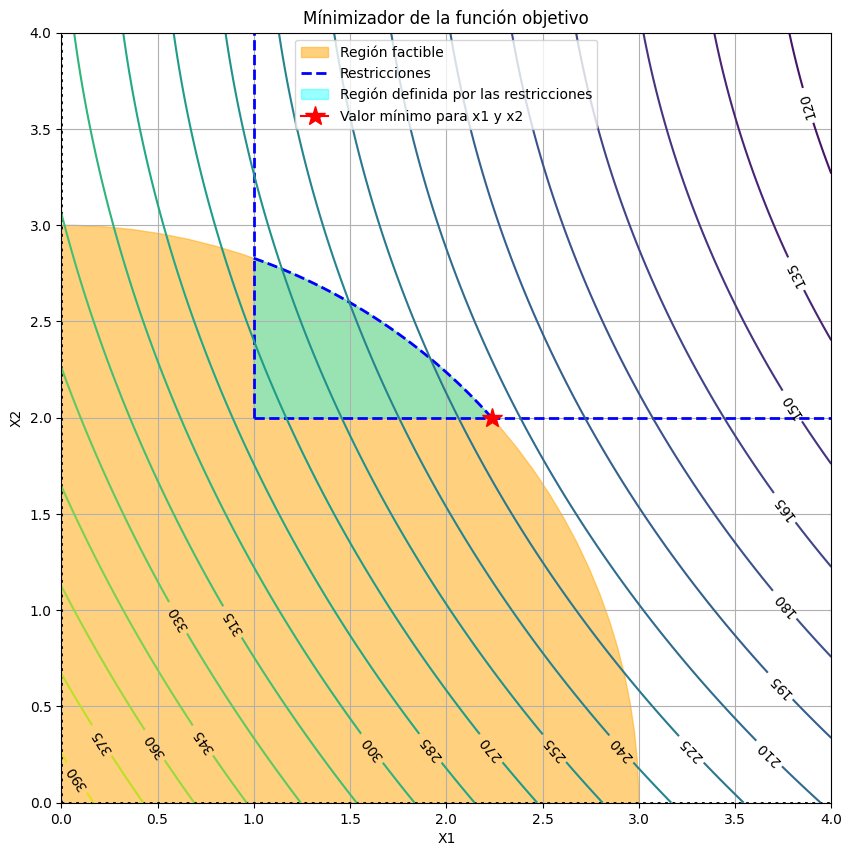

In [ ]:
# Creamos la figura y el gráfico 
fig, ax = plt.subplots(figsize=(10,10))

########## REGIÓN FACTIBLE ######################################################

# Podemos graficar la región directamente como un círculo
region_circular = plt.Circle((0,0), radius=3, color="orange", fill=True, alpha=0.5, label="Región factible")
ax.add_patch(region_circular) # Este método nos permite agregar directamente una figura geométrica al gráfico

# Definimos unos límites adecuados para mostrar la región
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_aspect('equal') # Ajustamos la relación de aspecto a 1:1

# Restricciones

# Dibujamos los límites impuestos a la región
# Los parámetros xmin y ymin definen el porcentaje del gráfico que ocupa cada línea
ax.axhline(y=2, xmin=0.25, linewidth=2, linestyle='--', color="blue", label="Restricciones")
ax.axvline(x=1, ymin=0.5, linewidth=2, linestyle='--', color="blue")

# Demarcación de la función objetivo

# Definimos los arreglos x1 y x2 para demarcar la región sobre la curva
x1 = np.linspace(1, 2.23, 100)
x2 = np.sqrt(9 - np.square(x1))
ax.plot(x1, x2, linewidth=2, linestyle='--', color="blue")

# Crear las coordenadas cerradas para la región a rellenar
x_fill = np.concatenate(([1], x1, [2.23], [1]))  # x1 con puntos inicial y final
y_fill = np.concatenate(([2], x2, [2], [2]))  # y2 con línea horizontal en y=2

# Rellenar la región entre los límites con color
ax.fill(x_fill, y_fill, color='cyan', alpha=0.4, label="Región definida por las restricciones")

# Dibujamos ejes para mejorar la presentación de la figura
ax.axhline(y=0, color="black", linestyle=':', linewidth=2)
ax.axvline(x=0, color="black", linestyle=':', linewidth=2)

##### CURVAS DE NIVEL PARA LA FUNCIÓN OBJETIVO ######################################

# Variables independientes
x_1 = np.linspace(0,4,100)
x_2 = np.linspace(0,4,100)
# Formamos la malla de puntos
(X_1, X_2) = np.meshgrid(x_1, x_2)

# Calculamos el valor de la función objetivo
funcion_objetivo = 3*np.square(X_1 - 10) + 4*np.square(X_2 - 5)
# Generamos las curvas de nivel
CS1 = ax.contour(X_1, X_2, funcion_objetivo, levels=20)
ax.clabel(CS1, rightside_up = False, colors="black")

####### GRAFICAMOS EL VALOR MÍNIMO HALLADO #########################################

x1_min, x2_min = minimization_f["x"]
ax.plot(x1_min, x2_min, marker='*', markersize=15, color='red', label="Valor mínimo para x1 y x2")

# Agregamos título al gráfico y etiquetas a los ejes
ax.set_ylabel("X2")
ax.set_xlabel("X1")
ax.grid()
ax.legend()
ax.set_title("Mínimizador de la función objetivo")
plt.show()

## **Ejercicios**

### **1. Número óptimo de diagnósticos**

El Hospital San Juan de Dios desea determinar cúal es el número de diagnósticos para cada procedimiento (Respiratorio, Coronarias, Partos y Adicciones) que le permitirá maximizar su utilidad. Para cada diagnóstico se ha establecido el número de recursos que requiere (Horas de diagnóstico, días en camas UCI, cuidados de enfermería, días-cama), la disponibilidad total de cada recurso y el margen de utilidad de cada procedimiento. Además, se sabe que el hospital debe atender un mínimo número de casos en estos diagnósticos. La siguiente tabla resume toda la información:


|  Recursos             | Respiratorio | C.Coronarias | Partos | Adicciones | Disponibilidad |
|-----------------------|--------------|--------------|--------|------------|----------------|
| Horas de diagnóstico  | 7            | 10           | 2      | 1          |  325           |
| Dias cama UCI         | 1            | 2.5          | 0.5    | 0          |  55            |
| Dias - cama           | 5            | 7            | 2      | 7          |  420           |
| Cuidados de enfermería| 50           | 88           | 27     | 50         |  3800          |
| Margen de utilidad    | 40           | 250          | 30     | 5          |                |
| Casos Mínimos         | 15           | 10           | 20     |            |                |

**1.1** Defina la función objetivo y las restricciones asociadas de acuerdo a la información anterior.


## Función Objetivo y Restricciones

Sea $X = [R, C, P, A]$ donde:
- **R**: Diagnósticos respiratorios
- **C**: Diagnósticos de coronarias
- **P**: Partos
- **A**: Adicciones

### Función Objetivo

Maximizar la utilidad:

$$\max U = 40R + 250C + 30P + 5A$$

En `scipy.minimize()` se minimiza, por lo que la función objetivo se define como:

$$f(X) = -(40R + 250C + 30P + 5A)$$

### Restricciones

**Horas de diagnóstico disponibles:**
$$7R + 10C + 2P + A \leq 325$$
En SciPy: $325 - (7R + 10C + 2P + A) \geq 0$

**Días-cama en UCI disponibles:**
$$R + 2.5C + 0.5P + 0A \leq 55$$
En SciPy: $55 - (R + 2.5C + 0.5P) \geq 0$

**Días-cama totales disponibles:**
$$5R + 7C + 2P + 7A \leq 420$$
En SciPy: $420 - (5R + 7C + 2P + 7A) \geq 0$

**Cuidados de enfermería disponibles:**
$$50R + 88C + 27P + 50A \leq 3800$$
En SciPy: $3800 - (50R + 88C + 27P + 50A) \geq 0$

**Mínimo casos respiratorios:**
$$R \geq 15$$
En SciPy: $R - 15 \geq 0$

**Mínimo casos coronarias:**
$$C \geq 10$$
En SciPy: $C - 10 \geq 0$

**Mínimo casos partos:**
$$P \geq 20$$
En SciPy: $P - 20 \geq 0$

**No negatividad (adicciones):**
$$A \geq 0$$


In [17]:
# 1.1 Función objetivo y restricciones
from scipy.optimize import minimize

# X = [R, C, P, A]
# R: Respiratorio, C: Coronarias, P: Partos, A: Adicciones
def funcion_objetivo(X):
    return -(40*X[0] + 250*X[1] + 30*X[2] + 5*X[3])

# Restricciones (formato scipy: ineq => fun(X) >= 0)
def restr_horas_diag(X):
    return 325 - (7*X[0] + 10*X[1] + 2*X[2] + 1*X[3])

def restr_uci(X):
    return 55 - (1*X[0] + 2.5*X[1] + 0.5*X[2] + 0*X[3])

def restr_dias_cama(X):
    return 420 - (5*X[0] + 7*X[1] + 2*X[2] + 7*X[3])

def restr_enfermeria(X):
    return 3800 - (50*X[0] + 88*X[1] + 27*X[2] + 50*X[3])

def restr_min_resp(X):
    return X[0] - 15

def restr_min_coronarias(X):
    return X[1] - 10

def restr_min_partos(X):
    return X[2] - 20

constraints = [
    {"type": "ineq", "fun": restr_horas_diag},
    {"type": "ineq", "fun": restr_uci},
    {"type": "ineq", "fun": restr_dias_cama},
    {"type": "ineq", "fun": restr_enfermeria},
    {"type": "ineq", "fun": restr_min_resp},
    {"type": "ineq", "fun": restr_min_coronarias},
    {"type": "ineq", "fun": restr_min_partos},
]

**1.2.** Defina los límites para cada una de las variables independientes (*bounds* de *minimize()*)

In [18]:
# 1.2 Bounds de las variables [R, C, P, A]
# R: Respiratorio, C: Coronarias, P: Partos, A: Adicciones
# No se permiten diagnósticos negativos
boundaries = [(0, None), (0, None), (0, None), (0, None)]

# Punto inicial factible
x0 = [15, 10, 20, 0]

**1.3.** Calcule el minimizador haciendo uso de la función *minimize()* de **SciPy**. Verifique el estado de convergencia de su resultado.

In [19]:
# 1.3 Minimización (equivale a maximizar utilidad porque la FO está negada)
minimization_f = minimize(funcion_objetivo, x0, bounds=boundaries, constraints=constraints)

R, C, P, A = minimization_f.x

print(f"Diagnósticos óptimos [R, C, P, A]: {minimization_f.x}")
print(f"Respiratorio={R:.4f}, Coronarias={C:.4f}, Partos={P:.4f}, Adicciones={A:.4f}")
print(f"Valor mínimo de la FO (negativa): {minimization_f.fun:.4f}")
print(f"Utilidad máxima: {-minimization_f.fun:.4f}")
print(f"Convergió: {minimization_f.success}")
print(f"Mensaje: {minimization_f.message}")
print(f"Iteraciones: {minimization_f.nit}")

Diagnósticos óptimos [R, C, P, A]: [15.   12.   20.   29.08]
Respiratorio=15.0000, Coronarias=12.0000, Partos=20.0000, Adicciones=29.0800
Valor mínimo de la FO (negativa): -4345.4000
Utilidad máxima: 4345.4000
Convergió: True
Mensaje: Optimization terminated successfully
Iteraciones: 4


**1.4.** Imprima el minimizador calculado, evalue y muestre que se cumplen cada una de las restricciones del problema.

=== Solución encontrada ===
R (Respiratorio): 15.000000
C (Coronarias):   12.000000
P (Partos):       20.000000
A (Adicciones):   29.080000
Convergió:        True
Mensaje:          Optimization terminated successfully
Iteraciones:      4
Utilidad máxima:  4345.400001

=== Verificación de restricciones ===
Horas diagnóstico: 294.08 <= 325  -> True
Días cama UCI:     55.00 <= 55   -> True
Días-cama:         402.56 <= 420 -> True
Enfermería:        3800.00 <= 3800 -> True
Mínimo Respiratorio: 15.00 >= 15 -> True
Mínimo Coronarias:   12.00 >= 10 -> True
Mínimo Partos:       20.00 >= 20 -> True
No negatividad A:    29.08 >= 0  -> True


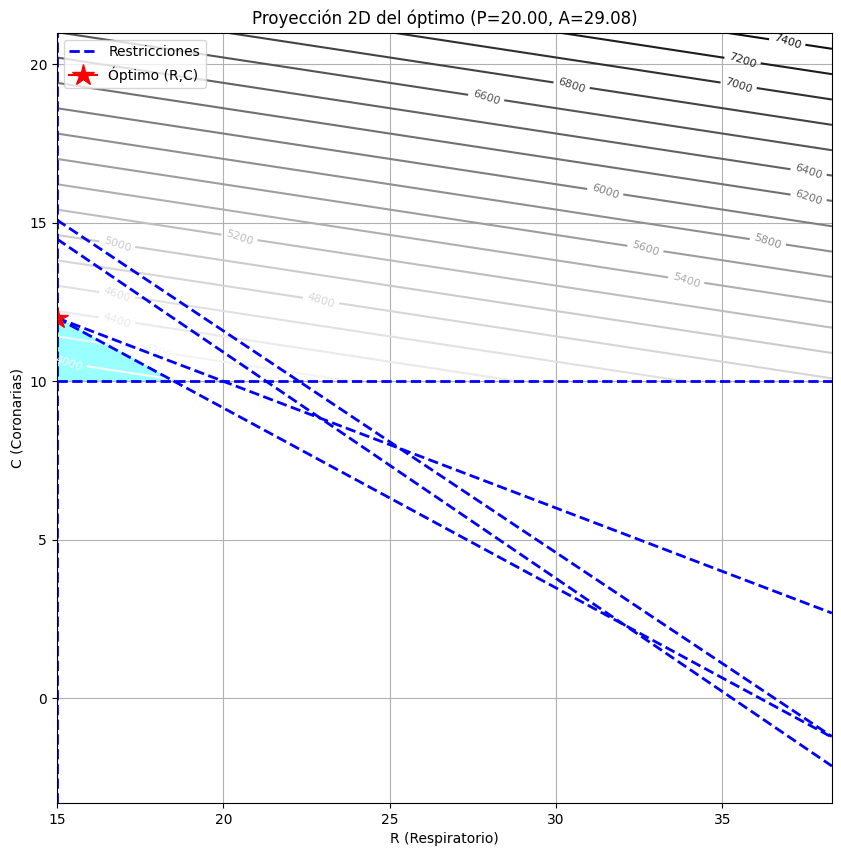

In [21]:
# 1.4 Imprimir minimizador y verificar restricciones

R, C, P, A = minimization_f.x
eps = 1e-6  # tolerancia numérica

print("=== Solución encontrada ===")
print(f"R (Respiratorio): {R:.6f}")
print(f"C (Coronarias):   {C:.6f}")
print(f"P (Partos):       {P:.6f}")
print(f"A (Adicciones):   {A:.6f}")
print(f"Convergió:        {minimization_f.success}")
print(f"Mensaje:          {minimization_f.message}")
print(f"Iteraciones:      {minimization_f.nit}")
print(f"Utilidad máxima:  {-minimization_f.fun:.6f}")  # porque FO está negada

# Consumos / mínimos
horas_usadas = 7*R + 10*C + 2*P + A
uci_usadas = R + 2.5*C + 0.5*P
dias_cama_usados = 5*R + 7*C + 2*P + 7*A
enfermeria_usada = 50*R + 88*C + 27*P + 50*A

print("\n=== Verificación de restricciones ===")
print(f"Horas diagnóstico: {horas_usadas:.2f} <= 325  -> {horas_usadas <= 325 + eps}")
print(f"Días cama UCI:     {uci_usadas:.2f} <= 55   -> {uci_usadas <= 55 + eps}")
print(f"Días-cama:         {dias_cama_usados:.2f} <= 420 -> {dias_cama_usados <= 420 + eps}")
print(f"Enfermería:        {enfermeria_usada:.2f} <= 3800 -> {enfermeria_usada <= 3800 + eps}")

print(f"Mínimo Respiratorio: {R:.2f} >= 15 -> {R >= 15 - eps}")
print(f"Mínimo Coronarias:   {C:.2f} >= 10 -> {C >= 10 - eps}")
print(f"Mínimo Partos:       {P:.2f} >= 20 -> {P >= 20 - eps}")
print(f"No negatividad A:    {A:.2f} >= 0  -> {A >= 0 - eps}")

# === Gráfica 1.4 (proyección 2D del problema de 4 variables) ===
# Variables: X = [R, C, P, A]
R_opt, C_opt, P_opt, A_opt = minimization_f.x
P_fix, A_fix = P_opt, A_opt

# Límites para la malla (según restricciones al fijar P y A)
R_max = min((325 - 2*P_fix - A_fix)/7,
            (55 - 0.5*P_fix),
            (420 - 2*P_fix - 7*A_fix)/5,
            (3800 - 27*P_fix - 50*A_fix)/50)

C_max = min((325 - 2*P_fix - A_fix)/10,
            (55 - 0.5*P_fix)/2.5,
            (420 - 2*P_fix - 7*A_fix)/7,
            (3800 - 27*P_fix - 50*A_fix)/88)

R = np.linspace(15, max(16, R_max + 3), 400)
C = np.linspace(10, max(11, C_max + 3), 400)
RR, CC = np.meshgrid(R, C)

# Restricciones (con P y A fijos)
g1 = 325 - (7*RR + 10*CC + 2*P_fix + A_fix)                # horas diagnóstico
g2 = 55 - (RR + 2.5*CC + 0.5*P_fix)                        # UCI
g3 = 420 - (5*RR + 7*CC + 2*P_fix + 7*A_fix)               # días-cama
g4 = 3800 - (50*RR + 88*CC + 27*P_fix + 50*A_fix)          # enfermería
g5 = RR - 15                                                # mínimo R
g6 = CC - 10                                                # mínimo C

factible = (g1 >= 0) & (g2 >= 0) & (g3 >= 0) & (g4 >= 0) & (g5 >= 0) & (g6 >= 0)

# Utilidad en la proyección
U = 40*RR + 250*CC + 30*P_fix + 5*A_fix

fig, ax = plt.subplots(figsize=(10, 10))

# Curvas de nivel de utilidad
CS = ax.contour(RR, CC, U, levels=20, cmap="Greys")
ax.clabel(CS, inline=True, fontsize=8)

# Región factible
ax.contourf(RR, CC, factible.astype(int), levels=[0.5, 1.5], colors=["cyan"], alpha=0.4, zorder=0)

# Fronteras de restricciones (igualdad)
r_line = np.linspace(R.min(), R.max(), 400)
c1 = (325 - 2*P_fix - A_fix - 7*r_line)/10
c2 = (55 - 0.5*P_fix - r_line)/2.5
c3 = (420 - 2*P_fix - 7*A_fix - 5*r_line)/7
c4 = (3800 - 27*P_fix - 50*A_fix - 50*r_line)/88

ax.plot(r_line, c1, '--', color='blue', linewidth=2, label='Restricciones')
ax.plot(r_line, c2, '--', color='blue', linewidth=2)
ax.plot(r_line, c3, '--', color='blue', linewidth=2)
ax.plot(r_line, c4, '--', color='blue', linewidth=2)
ax.axvline(15, linestyle='--', color='blue', linewidth=2)
ax.axhline(10, linestyle='--', color='blue', linewidth=2)

# Punto óptimo proyectado
ax.plot(R_opt, C_opt, marker='*', markersize=16, color='red', label='Óptimo (R,C)')

ax.set_xlabel("R (Respiratorio)")
ax.set_ylabel("C (Coronarias)")
ax.set_title(f"Proyección 2D del óptimo (P={P_fix:.2f}, A={A_fix:.2f})")
ax.grid(True)
ax.legend()
plt.show()

### **2. Proveedor óptimo**

La farmaceutica multinacional "Drugdis" se encuentra en proceso de abrir una sede en Colombia que incluye la apertura de una fábrica para sintetizar tres medicamentos usados en el tratamiento de la artritis. En un acuerdo de cooperación con el gobierno colombiano, se acordó que la empresa comprará los insumos necesarios para la fabricación de estos medicamentos a una empresa colombiana. Mediante un proceso de licitación se postularon tres proveedores. Los precios que ofrece cada uno se presentan en la siguiente tabla:

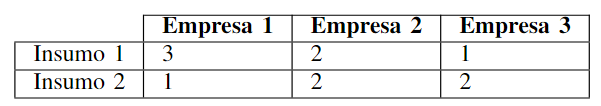

Por otra parte, la farmacéutica requiere las siguientes cantidades de insumos por cada unidad de medicamento:

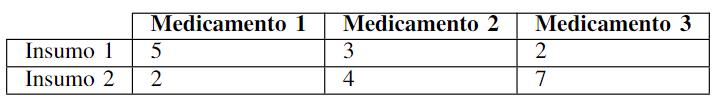

La empresa farmaceútica proyecta comprar 1600 unidades de *Insumo 1* y 2000 unidades de *Insumo 2* para la fabricación. Para mantener la planta en funcionamiento se deben fabricar al menos 400 unidades entre todos los productos.

El precio de venta de cada medicamento se presenta a continuación:

**Medicamento 1:** $25

**Medicamento 2:** $20

**Medicamento 3:** $15

Con base en la información suministrada, usted fue contratado como consultor y debe informar a la empresa cúal es el proveedor que permitirá maximizar la ganancia de la farmacéutica. 

**2.1.** Defina la función objetivo que permite maximizar la ganancia de la empresa en función de las unidades vendidas y las restricciones de materia prima requeridas para cada medicamento. 

In [11]:
# Defina en este espacio la función objetivo y las restricciones

import numpy as np
from scipy.optimize import minimize

# Variables de decisión:
# x[0] = unidades del Medicamento 1
# x[1] = unidades del Medicamento 2
# x[2] = unidades del Medicamento 3

# Precios de venta por medicamento
precio_venta = np.array([25.0, 20.0, 15.0])

# Consumo de insumos por medicamento
# Filas: [Insumo 1, Insumo 2], Columnas: [Med 1, Med 2, Med 3]
consumo_insumos = np.array([
    [5.0, 3.0, 2.0],
    [2.0, 4.0, 7.0]
])

# Disponibilidades de insumos
disp_insumo_1 = 1600.0
disp_insumo_2 = 2000.0

# Producción mínima total
produccion_min = 400.0

# Precios por proveedor para cada insumo: [Insumo 1, Insumo 2]
proveedores = {
    "Empresa 1": np.array([3.0, 1.0]),
    "Empresa 2": np.array([2.0, 2.0]),
    "Empresa 3": np.array([1.0, 2.0])
}


def funcion_objetivo(x, precios_insumo):
    """
    Minimizamos el negativo de la ganancia para usar scipy.optimize.minimize.
    Ganancia = ingresos por venta - costo de insumos.
    """
    ingresos = np.dot(precio_venta, x)
    costo = (
        precios_insumo[0] * np.dot(consumo_insumos[0], x) +
        precios_insumo[1] * np.dot(consumo_insumos[1], x)
    )
    return -(ingresos - costo)


def restriccion_insumo_1(x):
    return disp_insumo_1 - np.dot(consumo_insumos[0], x)


def restriccion_insumo_2(x):
    return disp_insumo_2 - np.dot(consumo_insumos[1], x)


def restriccion_produccion_minima(x):
    return np.sum(x) - produccion_min


def construir_restricciones():
    """Restricciones en formato g(x) >= 0 para scipy."""
    return [
        {"type": "ineq", "fun": restriccion_insumo_1},
        {"type": "ineq", "fun": restriccion_insumo_2},
        {"type": "ineq", "fun": restriccion_produccion_minima},
    ]


# Límites: no se pueden producir cantidades negativas
boundaries = [(0, None), (0, None), (0, None)]




**2.2.** Calcule la máxima ganancia que genera cada proveedor haciendo uso de la función *minimize()* de **SciPy**. Verifique el estado de convergencia de su resultado. 

In [13]:
# Ejecute minimize() a partir de su función objetivo y sus restricciones

resultados = {}
restricciones = construir_restricciones()

# Punto inicial factible
x0 = np.array([100.0, 150.0, 150.0])

for nombre, precios_insumo in proveedores.items():
    res = minimize(
        funcion_objetivo,
        x0,
        args=(precios_insumo,),
        bounds=boundaries,
        constraints=restricciones,
        method="SLSQP"
    )

    x_opt = res.x
    ganancia_max = -res.fun

    uso_i1 = np.dot(consumo_insumos[0], x_opt)
    uso_i2 = np.dot(consumo_insumos[1], x_opt)

    resultados[nombre] = {
        "resultado": res,
        "x_opt": x_opt,
        "ganancia_max": ganancia_max,
        "uso_i1": uso_i1,
        "uso_i2": uso_i2,
    }

    





**2.3.** Imprima la ganancia máxima obtenida para cada proveedor así como el número de insumos necesarios. Finalmente, decida cual de las tres empresas es la mejor proveedora de insumos y explique el por qué de su elección.

In [14]:
for nombre, precios_insumo in proveedores.items():
    print(f"\n=== {nombre} ===")
    print(f"Convergencia: {res.success} | Mensaje: {res.message}")
    print(f"Unidades óptimas [Med1, Med2, Med3]: {x_opt}")
    print(f"Ganancia máxima: {ganancia_max:.2f}")
    print(f"Insumo 1 usado: {uso_i1:.2f} / {disp_insumo_1}")
    print(f"Insumo 2 usado: {uso_i2:.2f} / {disp_insumo_2}")
    print(f"Producción total: {np.sum(x_opt):.2f}")

# Selección del mejor proveedor
def clave_ganancia(nombre_proveedor):
    return resultados[nombre_proveedor]["ganancia_max"]

mejor = max(resultados, key=clave_ganancia)
print("\n" + "="*60)
print(f"Mejor proveedor: {mejor}")
print(f"Ganancia máxima global: {resultados[mejor]['ganancia_max']:.2f}")
print(
    "Motivo: ofrece la mayor utilidad neta bajo las mismas restricciones "
    "de insumos y producción mínima."
)



=== Empresa 1 ===
Convergencia: True | Mensaje: Optimization terminated successfully
Unidades óptimas [Med1, Med2, Med3]: [2.00000000e+02 2.00000000e+02 5.33851807e-09]
Ganancia máxima: 5000.00
Insumo 1 usado: 1600.00 / 1600.0
Insumo 2 usado: 1200.00 / 2000.0
Producción total: 400.00

=== Empresa 2 ===
Convergencia: True | Mensaje: Optimization terminated successfully
Unidades óptimas [Med1, Med2, Med3]: [2.00000000e+02 2.00000000e+02 5.33851807e-09]
Ganancia máxima: 5000.00
Insumo 1 usado: 1600.00 / 1600.0
Insumo 2 usado: 1200.00 / 2000.0
Producción total: 400.00

=== Empresa 3 ===
Convergencia: True | Mensaje: Optimization terminated successfully
Unidades óptimas [Med1, Med2, Med3]: [2.00000000e+02 2.00000000e+02 5.33851807e-09]
Ganancia máxima: 5000.00
Insumo 1 usado: 1600.00 / 1600.0
Insumo 2 usado: 1200.00 / 2000.0
Producción total: 400.00

Mejor proveedor: Empresa 3
Ganancia máxima global: 5000.00
Motivo: ofrece la mayor utilidad neta bajo las mismas restricciones de insumos y p